# 簡介
在聯邦學習和人物重識別任務中，Non-IID都是最大的挑戰之一
> 在機率論與統計學中，獨立同分布（英語：Independent and identically distributed，或稱獨立同分配，縮寫為iid、 i.i.d.、IID）是指一組隨機變數中每個變數的機率分布都相同，且這些隨機變數互相獨立。[1]
一組隨機變數獨立同分布並不意味著它們的樣本空間中每個事件發生機率都相同[2]。例如，投擲非均勻骰子得到的結果序列是獨立同分布的，但擲出每個面朝上的機率並不相同。
-wiki


**在統計學中，獨立和同分布是非常重要的概念。也是多種**
- 簡單來說
    - 獨立意味著兩個或多個隨機變量之間沒有關聯
    - 同分布意味著它們具有相同的機率分布。
- 如果兩個或多個隨機變量之間存在某種形式的相依關係，則它們就是非獨立的。
    - 這種相依關係可以是各種不同的形式，例如，一個變量的值可能取決於另一個變量的值，或者它們可能受到共同的影響因素的影響。
- 同樣地，如果兩個或多個隨機變量的機率分布不同，則它們就是非同分布的。
    - 這種不同的機率分布可以是任何形式，例如，它們可以有不同的平均值、變異數或形狀等。
    
### Person ReID中的NonIDD。
<img src="https://production-media.paperswithcode.com/datasets/Market-1501-0000000097-a728ab2d_gyNBlrI.jpg"  width="480" height="240">

Person ReID人物重識別，是跨越多個攝影機拍攝的畫面重新識別出同一個人，基於攝影機之間的空間差異，角度、光線等，同一個人，也就是同樣的Person ID，在不同攝影機(不同cam-id)之間，通常都會是Non-IDD的。

#### **因此ReID的任務和聯邦學習的任務在這方面會使用不同的方法解決相同的問題。**
> 思考: 請問Person ReID可能是哪一種形式的Non-IDD?

## NonIID的類型
- 標籤的偏差（Label distribution skew）：不同客戶端之間對標籤(y)的分布的「觀察」有差異，標籤不平衡（label imbalance）。
    - 舉例來說，某個客戶端對鳶尾花的3種品種各觀察了100株，另一個客戶端所在的位置setosa鳶尾花(特定品種)較多，300筆資料幾乎都是setosa鳶尾花。
- 特徵的偏差（Feature distribution skew）：原始資料(x)的偏差，不同客戶端之間原始資料(x)的分布有差異。(偏差與標籤無關)
    - 舉例來說，某個客戶端在雨林裡觀察鳶尾花的特徵，某個是在空曠的荒原。這些地點的特徵受日照影響而無關品種的有所不同。
- 標籤相同但特徵不同（Same label but different features）: 標籤相同，卻有不同定義(特徵)。
    - 舉例來說，在擁有相同氣候內的區域裡，setosa鳶尾花(特定品種)，因為地形差異，不同客戶端採集到的各項特徵會有不同。
- 相同特徵但有不同標籤（Same features but different labels）：相同特徵但不同標籤。
    - 舉例來說，比較小顆的 versicolor和比較大顆的setosa鳶尾花在特徵上，尤其是花萼長度會相近。
- 總量偏差（Quantity skew (Unbalance)）：通常意義上的資料不平衡，不同客戶端在資料總量上有差異。
    - 舉例來說，某些客戶端很認真，收集了3000筆資料，某些客戶端卻只有30筆。
    
    
## 我們用簡單的IRIS鳶尾花來進一步了解Non-IDD

In [1]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Print the first 5 rows of the data
print("First 5 rows of data:")
print(iris.data[:5])

# Print the first 5 target values
print("First 5 target values:")
print(iris.target[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 target values:
[0 0 0 0 0]


In [2]:
sepal_length = [i[0] for i in iris.data]
sepal_length[:10]

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9]

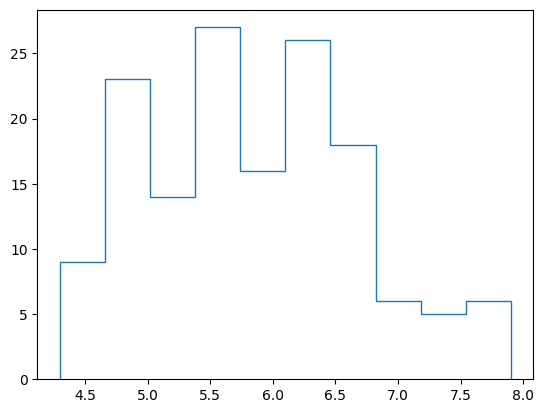

In [3]:
import numpy as np
import matplotlib.pyplot as plt

counts, bins = np.histogram(sepal_length) # 以 bins所描述的上下界數值為界裝箱。所以bins有11個元素，counts有10個元素
plt.stairs(counts, bins)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

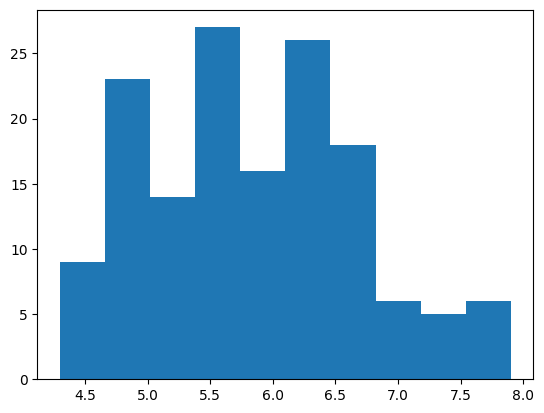

In [4]:
plt.hist(bins[:-1], bins, weights=counts)

標籤的偏差（Label distribution skew）


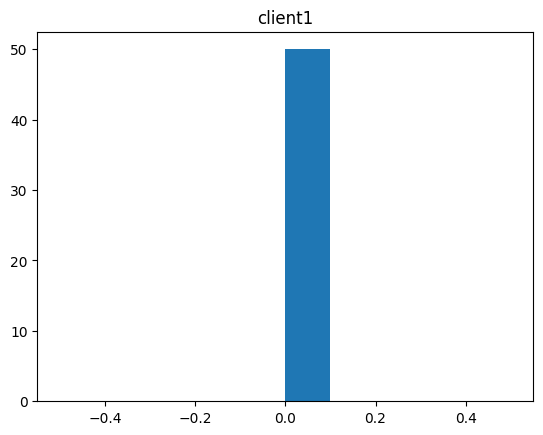

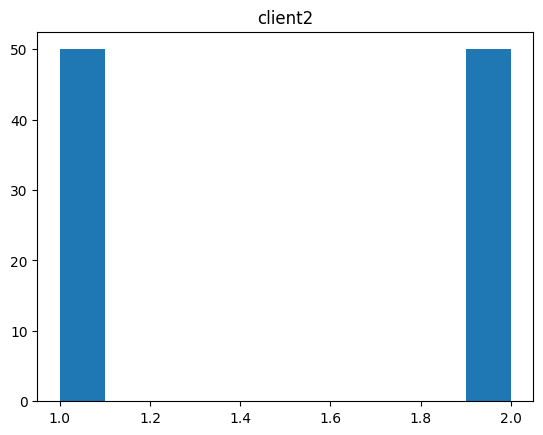

In [5]:
# 標籤的偏差（Label distribution skew）
arr = iris.target
client1 = arr[arr==0]
client2 = arr[arr!=0]

print('標籤的偏差（Label distribution skew）')

for client in ['client1','client2']:
    counts, bins = np.histogram(eval(client))  # eval把字串換成變數
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(client)
    plt.show()

特徵的偏差（Feature distribution skew）


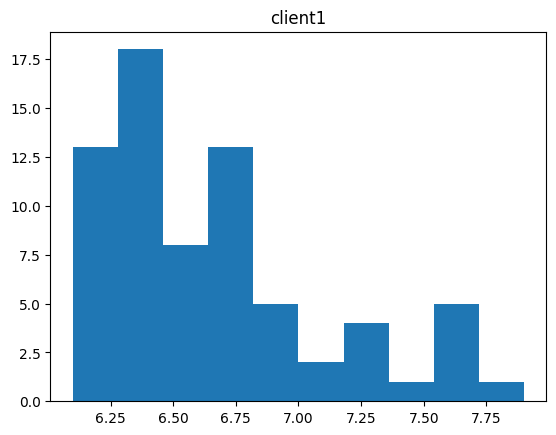

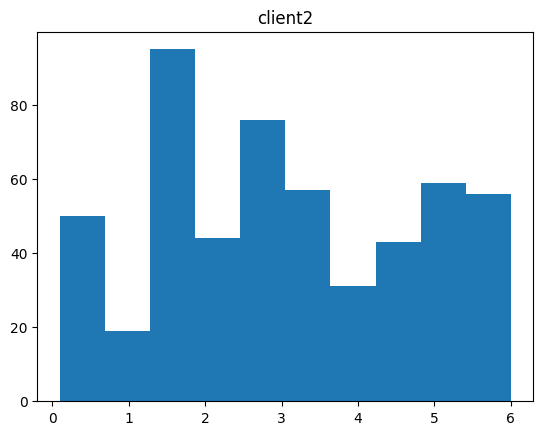

In [6]:
# 特徵的偏差（Feature distribution skew）
arr = iris.data
client1 = arr[arr>=6.10]
client2 = arr[arr<6.1]

print('特徵的偏差（Feature distribution skew）')

for client in ['client1','client2']:
    counts, bins = np.histogram(eval(client))  # eval把字串換成變數
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(client)
    plt.show()

### 標籤相同但特徵不同（Same label but different features）
![](https://i.imgur.com/SCQM5OV.png)

標籤相同但特徵不同（Same label but different features）


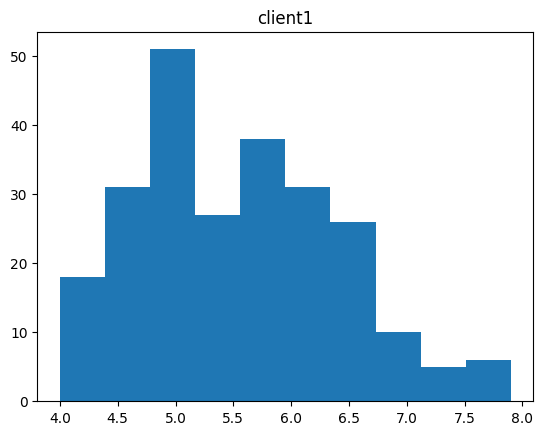

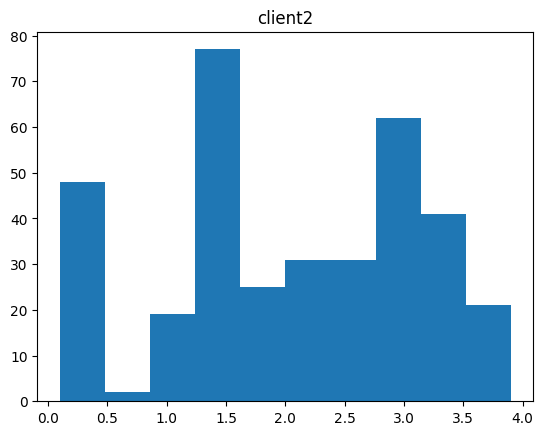

In [7]:
# 標籤相同但特徵不同（Same label but different features）
data = iris.data[iris.target==0, 0] # setosa, 'sepal length (cm)'

client1 = arr[arr>=4]
client2 = arr[arr<4]

print('標籤相同但特徵不同（Same label but different features）')

for client in ['client1','client2']:
    counts, bins = np.histogram(eval(client))  # eval把字串換成變數
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(client)
    plt.show()

相同特徵但有不同標籤（Same features but different labels）


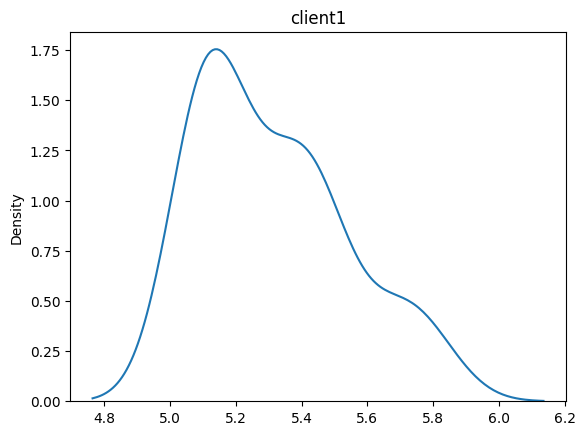

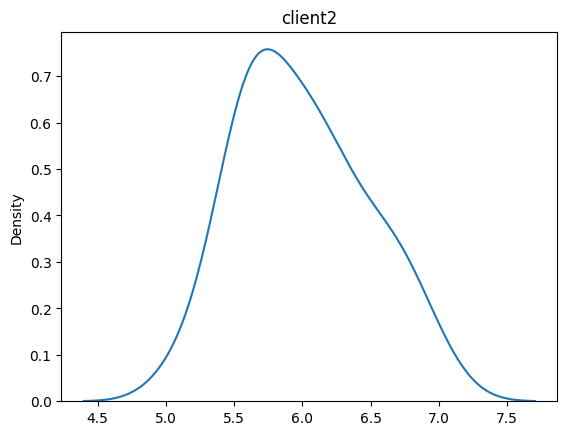

In [8]:
import seaborn as sns
# 相同特徵但有不同標籤（Same features but different labels）
client1 = iris.data[iris.target==0, 0] # 'setosa' 'versicolor' 'virginica'
client1 = client1[client1>5]
client2 = iris.data[iris.target==1, 0]
client2 = client2[client2>5]

print('相同特徵但有不同標籤（Same features but different labels）')

for client in ['client1','client2']:
    sns.kdeplot(eval(client), bw_method=0.5)
    plt.title(client)
    plt.show()

總量偏差（Quantity skew (Unbalance)）


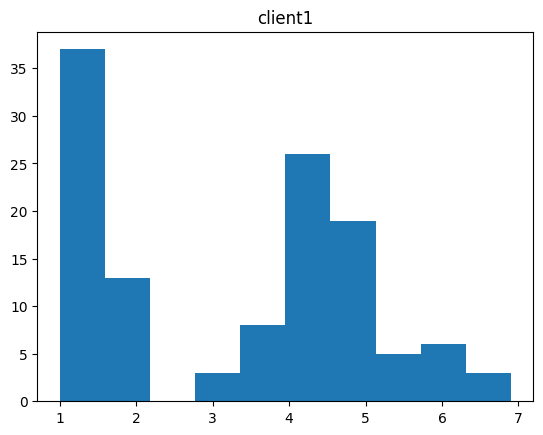

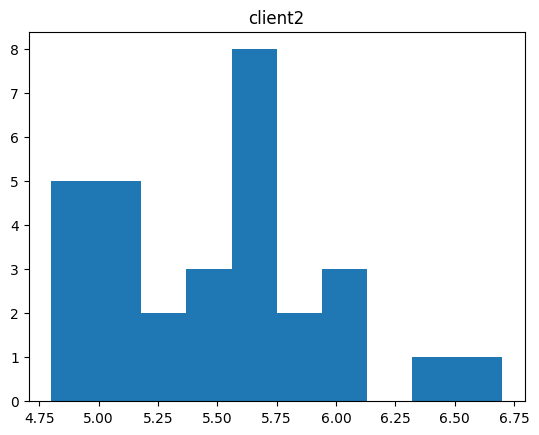

In [9]:
# 總量偏差（Quantity skew (Unbalance)）

client1 = iris.data[:120, 2]
client2 = iris.data[120:, 2]

print('總量偏差（Quantity skew (Unbalance)）')


for client in ['client1','client2']:
    counts, bins = np.histogram(eval(client))  # eval把字串換成變數
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(client)
    plt.show()